- **required packages**
    - wave
    - numpy
    - matplotlib.pyplot 
- **variables**
    - wav_file: the path of an audio file to go under Fourier Transformation
    - out_plot: a file name to save the visualization
    - target_time: exact time when a phoneme is realized
    - fft_size: the number of samples to process Fourier Transform
    
    - sampling_frequency: the number of samples to note for 1 second
    - num_samples: the number of samples in the audio file
    - waveform: x-axis Time y-axis Amplitude audio 
    
    - target_index: exact sample when a phone is realized 
    - frame: exact fraction of waveform to process Fourier Transform
    - spectrum: x-axis Frequency y-axis Amplitude audio
    - log_absolute: log-absolute value of spectrum file
- **steps**
    - assign 
        - wav_file, out_plot, taret_time, fft_size 
    - read files and attributes
        - sampling_frequency, num_samples, waveform
    - perform fourier transform
        - spectrum, absolute, log_absolute 
    - visualize and export


In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt

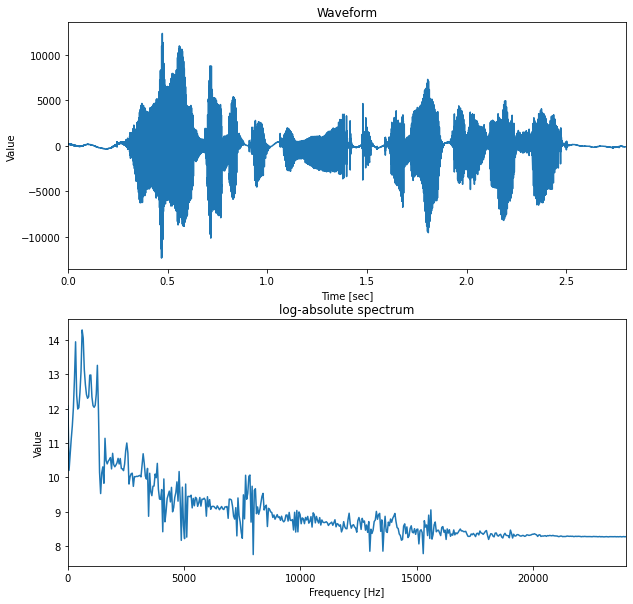

In [23]:
if __name__ == '__main__':
    wav_file = './basic5000/wav/BASIC5000_0018.wav'
    out_plot = './spectrum.png'
    target_time = 0.58
    fft_size = 1024
    
    with wave.open(wav_file) as wav:
        sampling_frequency = wav.getframerate()
        num_samples = wav.getnframes()
        waveform = wav.readframes(num_samples)
        waveform = np.frombuffer(waveform, dtype = np.int16)
        
        target_index = int(target_time * sampling_frequency)
        frame = waveform[target_index: (target_index + fft_size)]
        spectrum = np.fft.fft(frame)
        absolute = np.abs(spectrum)
        absolute = absolute[: int(fft_size / 2) + 1]
        log_absolute = np.log(absolute + 1E-7)
        
        plt.figure(figsize = (10, 10))
        plt.subplot(2, 1, 1)
        time_axis = np.arange(num_samples) / sampling_frequency
        plt.plot(time_axis, waveform)
        plt.xlim([0, num_samples / sampling_frequency])
        plt.title('Waveform')
        plt.xlabel('Time [sec]')
        plt.ylabel('Value')

        
        plt.subplot(2, 1, 2)
        freq_axis = np.arange(int(fft_size / 2) + 1) * sampling_frequency / fft_size 
        
        plt.plot(freq_axis, log_absolute)
        plt.xlim([0, sampling_frequency / 2])
        plt.title('log-absolute spectrum')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Value')
        
        plt.savefig(out_plot)